<a href="https://colab.research.google.com/github/forminju/DACON_anomaly_detection_/blob/main/minju_0215.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT

In [1]:
import pandas as pd
import random
import os
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

In [2]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#Base & visualization
import pandas as pd
import random
import os
import numpy as np
import warnings
import matplotlib.pylab as plt
import seaborn as sns

#sklearn module & utils
from tqdm.notebook import tqdm
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import StratifiedKFold , KFold, train_test_split, cross_val_score, cross_validate
from sklearn.feature_selection import SelectPercentile
warnings.filterwarnings('ignore') 

#Scaling
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encoding
import category_encoders as ce

#Sampling
from imblearn.over_sampling import BorderlineSMOTE

#Modeling
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, VotingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier, RidgeClassifierCV
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# SEED 고정

In [4]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(37) # Seed 고정

In [5]:
#Seed 고정
class CFG:
    SEED = 26

In [6]:
%cd /content/drive/MyDrive/스마트공장

/content/drive/MyDrive/스마트공장


# DATA LOAD

In [16]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [17]:
train.head()

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,TRAIN_000,1,0.533433,2022-06-13 5:14,T050304,A_31,NaN,NaN,NaN,NaN,...,39.34,40.89,32.56,34.09,77.77,NaN,NaN,NaN,NaN,NaN
1,TRAIN_001,2,0.541819,2022-06-13 5:22,T050307,A_31,NaN,NaN,NaN,NaN,...,38.89,42.82,43.92,35.34,72.55,NaN,NaN,NaN,NaN,NaN
2,TRAIN_002,1,0.531267,2022-06-13 5:30,T050304,A_31,NaN,NaN,NaN,NaN,...,39.19,36.65,42.47,36.53,78.35,NaN,NaN,NaN,NaN,NaN
3,TRAIN_003,2,0.537325,2022-06-13 5:39,T050307,A_31,NaN,NaN,NaN,NaN,...,37.74,39.17,52.17,30.58,71.78,NaN,NaN,NaN,NaN,NaN
4,TRAIN_004,1,0.531590,2022-06-13 5:47,T050304,A_31,NaN,NaN,NaN,NaN,...,38.70,41.89,46.93,33.09,76.97,NaN,NaN,NaN,NaN,NaN


# X / Y Labeling

# fillna
- ffill -> fillna(0)

In [18]:
train.drop(['X_3','X_4','X_6','X_10','X_14','X_19','X_26','X_27','X_28','X_29','X_30','X_31','X_32','X_33','X_34','X_35','X_36','X_37','X_67','X_68','X_69','X_70','X_71','X_72','X_74','X_75','X_76','X_77','X_78','X_79','X_80','X_81','X_82','X_83','X_84','X_85','X_89','X_91','X_92','X_93','X_96','X_100','X_104','X_108','X_112','X_116','X_122','X_135','X_142','X_147','X_154','X_158','X_162','X_166','X_170','X_174','X_178','X_182','X_186','X_187','X_188','X_190','X_191','X_192','X_193','X_194','X_195','X_232','X_234','X_235','X_239','X_241','X_244','X_249','X_252','X_255','X_259','X_260','X_264','X_274','X_278','X_282','X_312','X_313','X_314','X_315','X_316','X_317','X_319','X_322','X_323','X_324','X_325','X_326','X_327','X_328','X_329','X_330','X_334','X_336','X_343','X_347','X_351','X_355','X_359','X_363','X_369','X_375','X_376','X_377','X_378','X_381','X_382','X_383','X_390','X_391','X_392','X_409','X_410','X_411','X_424','X_425','X_426','X_427','X_429','X_430','X_431','X_432','X_433','X_434','X_466','X_467','X_487','X_503','X_505','X_508','X_512','X_519','X_558','X_561','X_567','X_583','X_617','X_620','X_631','X_633','X_634','X_636','X_638','X_639','X_640','X_641','X_642','X_650','X_672','X_673','X_676','X_691','X_692','X_695','X_715','X_729','X_732','X_743','X_749','X_759','X_760','X_761','X_764','X_776','X_777','X_778','X_836','X_843','X_844','X_849','X_859','X_872','X_873','X_874','X_879','X_880','X_881','X_886','X_887','X_888','X_889','X_912','X_950','X_951','X_952','X_969','X_970','X_971','X_987','X_988','X_989','X_992','X_1003','X_1004','X_1005','X_1006','X_1007','X_1008','X_1020','X_1021','X_1022','X_1023','X_1024','X_1025','X_1070','X_1092','X_1103','X_1119','X_1130','X_1137','X_1146','X_1157','X_1206','X_1216','X_1219','X_1248','X_1249','X_1250','X_1251','X_1252','X_1253','X_1255','X_1293','X_1298','X_1309','X_1311','X_1312','X_1314','X_1316','X_1317','X_1318','X_1319','X_1320','X_1328','X_1361','X_1362','X_1363','X_1364','X_1367','X_1392','X_1393','X_1394','X_1395','X_1396','X_1399','X_1426','X_1457','X_1487','X_1502','X_1503','X_1504','X_1522','X_1531','X_1537','X_1571','X_1572','X_1573','X_1574','X_1575','X_1576','X_1577','X_1578','X_1579','X_1580','X_1581','X_1582','X_1644','X_1645','X_1675','X_1676','X_1677','X_1680','X_1681','X_1683','X_1684','X_1685','X_1687','X_1688','X_1689','X_1691','X_1692','X_1693','X_1695','X_1698','X_1699','X_1700','X_1701','X_1702','X_1707','X_1709','X_1711','X_1719','X_1721','X_1722','X_1723','X_1724','X_1729','X_1733','X_1749','X_1753','X_1754','X_1759','X_1760','X_1765','X_1766','X_1771','X_1772','X_1777','X_1778','X_1783','X_1784','X_1789','X_1790','X_1795','X_1796','X_1801','X_1802','X_1803','X_1807','X_1808','X_1811','X_1823','X_1827','X_1828','X_1835','X_1836','X_1837','X_1838','X_1839','X_1840','X_1841','X_1842','X_1844','X_1845','X_1846','X_1847','X_1848','X_1851','X_1852','X_1869','X_1870','X_1871','X_1872','X_2052','X_2053','X_2054','X_2055','X_2188','X_2189','X_2417','X_2419','X_2420','X_2462','X_2549','X_2550','X_2730','X_2732','X_2733','X_2775','X_2871'],axis=1, inplace=True)
test.drop(['X_3','X_4','X_6','X_10','X_14','X_19','X_26','X_27','X_28','X_29','X_30','X_31','X_32','X_33','X_34','X_35','X_36','X_37','X_67','X_68','X_69','X_70','X_71','X_72','X_74','X_75','X_76','X_77','X_78','X_79','X_80','X_81','X_82','X_83','X_84','X_85','X_89','X_91','X_92','X_93','X_96','X_100','X_104','X_108','X_112','X_116','X_122','X_135','X_142','X_147','X_154','X_158','X_162','X_166','X_170','X_174','X_178','X_182','X_186','X_187','X_188','X_190','X_191','X_192','X_193','X_194','X_195','X_232','X_234','X_235','X_239','X_241','X_244','X_249','X_252','X_255','X_259','X_260','X_264','X_274','X_278','X_282','X_312','X_313','X_314','X_315','X_316','X_317','X_319','X_322','X_323','X_324','X_325','X_326','X_327','X_328','X_329','X_330','X_334','X_336','X_343','X_347','X_351','X_355','X_359','X_363','X_369','X_375','X_376','X_377','X_378','X_381','X_382','X_383','X_390','X_391','X_392','X_409','X_410','X_411','X_424','X_425','X_426','X_427','X_429','X_430','X_431','X_432','X_433','X_434','X_466','X_467','X_487','X_503','X_505','X_508','X_512','X_519','X_558','X_561','X_567','X_583','X_617','X_620','X_631','X_633','X_634','X_636','X_638','X_639','X_640','X_641','X_642','X_650','X_672','X_673','X_676','X_691','X_692','X_695','X_715','X_729','X_732','X_743','X_749','X_759','X_760','X_761','X_764','X_776','X_777','X_778','X_836','X_843','X_844','X_849','X_859','X_872','X_873','X_874','X_879','X_880','X_881','X_886','X_887','X_888','X_889','X_912','X_950','X_951','X_952','X_969','X_970','X_971','X_987','X_988','X_989','X_992','X_1003','X_1004','X_1005','X_1006','X_1007','X_1008','X_1020','X_1021','X_1022','X_1023','X_1024','X_1025','X_1070','X_1092','X_1103','X_1119','X_1130','X_1137','X_1146','X_1157','X_1206','X_1216','X_1219','X_1248','X_1249','X_1250','X_1251','X_1252','X_1253','X_1255','X_1293','X_1298','X_1309','X_1311','X_1312','X_1314','X_1316','X_1317','X_1318','X_1319','X_1320','X_1328','X_1361','X_1362','X_1363','X_1364','X_1367','X_1392','X_1393','X_1394','X_1395','X_1396','X_1399','X_1426','X_1457','X_1487','X_1502','X_1503','X_1504','X_1522','X_1531','X_1537','X_1571','X_1572','X_1573','X_1574','X_1575','X_1576','X_1577','X_1578','X_1579','X_1580','X_1581','X_1582','X_1644','X_1645','X_1675','X_1676','X_1677','X_1680','X_1681','X_1683','X_1684','X_1685','X_1687','X_1688','X_1689','X_1691','X_1692','X_1693','X_1695','X_1698','X_1699','X_1700','X_1701','X_1702','X_1707','X_1709','X_1711','X_1719','X_1721','X_1722','X_1723','X_1724','X_1729','X_1733','X_1749','X_1753','X_1754','X_1759','X_1760','X_1765','X_1766','X_1771','X_1772','X_1777','X_1778','X_1783','X_1784','X_1789','X_1790','X_1795','X_1796','X_1801','X_1802','X_1803','X_1807','X_1808','X_1811','X_1823','X_1827','X_1828','X_1835','X_1836','X_1837','X_1838','X_1839','X_1840','X_1841','X_1842','X_1844','X_1845','X_1846','X_1847','X_1848','X_1851','X_1852','X_1869','X_1870','X_1871','X_1872','X_2052','X_2053','X_2054','X_2055','X_2188','X_2189','X_2417','X_2419','X_2420','X_2462','X_2549','X_2550','X_2730','X_2732','X_2733','X_2775','X_2871'],axis=1,inplace=True)

In [19]:
def get_x_y(df):
    if 'Y_Class' in df.columns:
        df_x = df.drop(columns=['PRODUCT_ID', 'Y_Class', 'TIMESTAMP', 'Y_Quality'])
        df_y = df['Y_Class']
        return df_x, df_y
    else:
        df_x = df.drop(columns=['PRODUCT_ID', 'TIMESTAMP'])
        return df_x

train_x, train_y = get_x_y(train)
test_x = get_x_y(test)

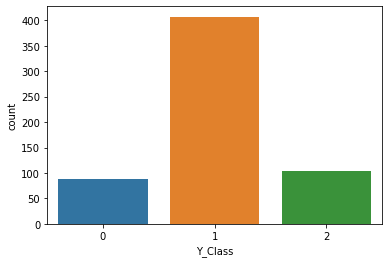

In [20]:
sns.countplot(train_y)

In [21]:
X_group = train_x.loc[:,'X_1':]; X_group

,X_1,X_2,X_5,X_7,X_8,X_9,X_11,X_12,X_13,X_15,...,X_2865,X_2866,X_2867,X_2868,X_2869,X_2870,X_2872,X_2873,X_2874,X_2875
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,353.0,39.34,40.89,32.56,34.09,77.77,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,353.0,38.89,42.82,43.92,35.34,72.55,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,353.0,39.19,36.65,42.47,36.53,78.35,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,353.0,37.74,39.17,52.17,30.58,71.78,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,352.0,38.70,41.89,46.93,33.09,76.97,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,2.0,95.0,10.0,50.0,10.0,52.0,468.9,473.9,459.2,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,353.0,49.47,53.07,50.89,55.10,66.49,NaN,NaN,NaN,NaN
595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,352.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
596,40.0,94.0,11.0,45.0,10.0,31.0,505.8,510.9,497.1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
X_group_pc = pd.DataFrame(X_group.isnull().sum() / len(X_group))

In [23]:
train_x.drop(X_group_pc[X_group_pc[0] > 0.8].index, axis=1,inplace=True)
test_x.drop(X_group_pc[X_group_pc[0] > 0.8].index, axis=1,inplace=True)

In [24]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'most_frequent')

imputer_output = imputer.fit_transform(train_x)

In [25]:
train_x = pd.DataFrame(imputer_output, columns=train_x.columns, index=list(train_x.index.values));train_x

,LINE,PRODUCT_CODE,X_1,X_2,X_5,X_7,X_8,X_9,X_11,X_12,...,X_2856,X_2857,X_2858,X_2859,X_2860,X_2861,X_2862,X_2863,X_2864,X_2865
0,T050304,A_31,2.0,95.0,10.0,45.0,10.0,31.0,505.8,498.6,...,181.6,139.6,131.646667,115.4,209.0,197.286667,189.0,383.0,368.296296,353.0
1,T050307,A_31,2.0,95.0,10.0,45.0,10.0,31.0,505.8,498.6,...,177.1,145.5,128.748276,119.7,198.0,193.296552,185.6,383.0,367.735849,353.0
2,T050304,A_31,2.0,95.0,10.0,45.0,10.0,31.0,505.8,498.6,...,183.6,128.0,115.365517,104.0,193.4,179.82069,165.5,383.0,367.320755,353.0
3,T050307,A_31,2.0,95.0,10.0,45.0,10.0,31.0,505.8,498.6,...,179.5,126.2,112.082759,94.5,190.3,181.92069,165.8,384.0,369.188679,353.0
4,T050304,A_31,2.0,95.0,10.0,45.0,10.0,31.0,505.8,498.6,...,188.0,152.1,138.066667,109.7,208.6,196.393333,182.6,383.0,367.351852,352.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,T100306,T_31,2.0,95.0,10.0,50.0,10.0,52.0,468.9,473.9,...,177.1,154.0,197.392857,93.4,184.8,171.437931,166.6,384.0,367.0,352.0
594,T050304,A_31,2.0,95.0,10.0,45.0,10.0,31.0,505.8,498.6,...,168.2,185.1,159.527586,144.2,198.3,180.810345,168.7,384.0,369.811321,353.0
595,T050304,A_31,2.0,95.0,10.0,45.0,10.0,31.0,505.8,498.6,...,153.4,187.6,178.248276,159.6,186.5,176.486207,156.6,383.0,367.018868,352.0
596,T100304,O_31,40.0,94.0,11.0,45.0,10.0,31.0,505.8,510.9,...,177.1,154.0,197.392857,93.4,184.8,171.437931,166.6,384.0,367.0,352.0


In [26]:
imputer_output_test = imputer.transform(test_x)

# LINE_PRODUCT 변수 생성

In [27]:
test_x = pd.DataFrame(imputer_output_test, columns=test_x.columns, index=list(test_x.index.values));test_x

,LINE,PRODUCT_CODE,X_1,X_2,X_5,X_7,X_8,X_9,X_11,X_12,...,X_2856,X_2857,X_2858,X_2859,X_2860,X_2861,X_2862,X_2863,X_2864,X_2865
0,T100306,T_31,2.0,94.0,10.0,51.0,10.0,52.0,469.6,474.4,...,177.1,154.0,197.392857,93.4,184.8,171.437931,166.6,384.0,367.0,352.0
1,T100304,T_31,2.0,93.0,11.0,45.0,10.0,31.0,506.6,511.1,...,177.1,154.0,197.392857,93.4,184.8,171.437931,166.6,384.0,367.0,352.0
2,T100304,T_31,2.0,95.0,11.0,45.0,10.0,31.0,506.6,511.4,...,177.1,154.0,197.392857,93.4,184.8,171.437931,166.6,384.0,367.0,352.0
3,T010305,A_31,2.0,95.0,10.0,45.0,10.0,31.0,505.8,498.6,...,159.4,201.3,179.739286,149.9,198.0,191.45,183.8,467.0,444.192308,423.0
4,T010306,A_31,2.0,95.0,10.0,45.0,10.0,31.0,505.8,498.6,...,175.3,227.9,190.664286,162.4,210.2,193.082143,179.7,465.0,443.211539,423.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,T100306,T_31,2.0,91.0,10.0,51.0,10.0,52.0,502.5,511.9,...,177.1,154.0,197.392857,93.4,184.8,171.437931,166.6,384.0,367.0,352.0
306,T100304,T_31,2.0,96.0,11.0,45.0,10.0,31.0,513.7,518.9,...,177.1,154.0,197.392857,93.4,184.8,171.437931,166.6,384.0,367.0,352.0
307,T100306,T_31,2.0,91.0,10.0,50.0,10.0,52.0,502.8,511.6,...,177.1,154.0,197.392857,93.4,184.8,171.437931,166.6,384.0,367.0,352.0
308,T100306,T_31,2.0,95.0,10.0,51.0,10.0,52.0,503.2,512.6,...,177.1,154.0,197.392857,93.4,184.8,171.437931,166.6,384.0,367.0,352.0


In [28]:
train_x['LINE_PRODUCT'] = train_x['LINE'].str.cat(train['PRODUCT_CODE'])

In [29]:
test_x['LINE_PRODUCT'] = test_x['LINE'].str.cat(test['PRODUCT_CODE'])

In [30]:
train_x['LINE_PRODUCT'].value_counts()

T100304T_31    172
T100306T_31    171
T050304A_31     78
T010306A_31     70
T010305A_31     59
T050307A_31     42
T100304O_31      3
T100306O_31      3
Name: LINE_PRODUCT, dtype: int64

In [31]:
train_x

,LINE,PRODUCT_CODE,X_1,X_2,X_5,X_7,X_8,X_9,X_11,X_12,...,X_2857,X_2858,X_2859,X_2860,X_2861,X_2862,X_2863,X_2864,X_2865,LINE_PRODUCT
0,T050304,A_31,2.0,95.0,10.0,45.0,10.0,31.0,505.8,498.6,...,139.6,131.646667,115.4,209.0,197.286667,189.0,383.0,368.296296,353.0,T050304A_31
1,T050307,A_31,2.0,95.0,10.0,45.0,10.0,31.0,505.8,498.6,...,145.5,128.748276,119.7,198.0,193.296552,185.6,383.0,367.735849,353.0,T050307A_31
2,T050304,A_31,2.0,95.0,10.0,45.0,10.0,31.0,505.8,498.6,...,128.0,115.365517,104.0,193.4,179.82069,165.5,383.0,367.320755,353.0,T050304A_31
3,T050307,A_31,2.0,95.0,10.0,45.0,10.0,31.0,505.8,498.6,...,126.2,112.082759,94.5,190.3,181.92069,165.8,384.0,369.188679,353.0,T050307A_31
4,T050304,A_31,2.0,95.0,10.0,45.0,10.0,31.0,505.8,498.6,...,152.1,138.066667,109.7,208.6,196.393333,182.6,383.0,367.351852,352.0,T050304A_31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,T100306,T_31,2.0,95.0,10.0,50.0,10.0,52.0,468.9,473.9,...,154.0,197.392857,93.4,184.8,171.437931,166.6,384.0,367.0,352.0,T100306T_31
594,T050304,A_31,2.0,95.0,10.0,45.0,10.0,31.0,505.8,498.6,...,185.1,159.527586,144.2,198.3,180.810345,168.7,384.0,369.811321,353.0,T050304A_31
595,T050304,A_31,2.0,95.0,10.0,45.0,10.0,31.0,505.8,498.6,...,187.6,178.248276,159.6,186.5,176.486207,156.6,383.0,367.018868,352.0,T050304A_31
596,T100304,O_31,40.0,94.0,11.0,45.0,10.0,31.0,505.8,510.9,...,154.0,197.392857,93.4,184.8,171.437931,166.6,384.0,367.0,352.0,T100304O_31


In [32]:
test_x

,LINE,PRODUCT_CODE,X_1,X_2,X_5,X_7,X_8,X_9,X_11,X_12,...,X_2857,X_2858,X_2859,X_2860,X_2861,X_2862,X_2863,X_2864,X_2865,LINE_PRODUCT
0,T100306,T_31,2.0,94.0,10.0,51.0,10.0,52.0,469.6,474.4,...,154.0,197.392857,93.4,184.8,171.437931,166.6,384.0,367.0,352.0,T100306T_31
1,T100304,T_31,2.0,93.0,11.0,45.0,10.0,31.0,506.6,511.1,...,154.0,197.392857,93.4,184.8,171.437931,166.6,384.0,367.0,352.0,T100304T_31
2,T100304,T_31,2.0,95.0,11.0,45.0,10.0,31.0,506.6,511.4,...,154.0,197.392857,93.4,184.8,171.437931,166.6,384.0,367.0,352.0,T100304T_31
3,T010305,A_31,2.0,95.0,10.0,45.0,10.0,31.0,505.8,498.6,...,201.3,179.739286,149.9,198.0,191.45,183.8,467.0,444.192308,423.0,T010305A_31
4,T010306,A_31,2.0,95.0,10.0,45.0,10.0,31.0,505.8,498.6,...,227.9,190.664286,162.4,210.2,193.082143,179.7,465.0,443.211539,423.0,T010306A_31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,T100306,T_31,2.0,91.0,10.0,51.0,10.0,52.0,502.5,511.9,...,154.0,197.392857,93.4,184.8,171.437931,166.6,384.0,367.0,352.0,T100306T_31
306,T100304,T_31,2.0,96.0,11.0,45.0,10.0,31.0,513.7,518.9,...,154.0,197.392857,93.4,184.8,171.437931,166.6,384.0,367.0,352.0,T100304T_31
307,T100306,T_31,2.0,91.0,10.0,50.0,10.0,52.0,502.8,511.6,...,154.0,197.392857,93.4,184.8,171.437931,166.6,384.0,367.0,352.0,T100306T_31
308,T100306,T_31,2.0,95.0,10.0,51.0,10.0,52.0,503.2,512.6,...,154.0,197.392857,93.4,184.8,171.437931,166.6,384.0,367.0,352.0,T100306T_31


# 라벨 인코딩

In [33]:
# qualitative to quantitative
qual_col = ['LINE', 'PRODUCT_CODE', 'LINE_PRODUCT']

for i in qual_col:
    le = LabelEncoder()
    le = le.fit(train_x[i])
    train_x[i] = le.transform(train_x[i])
    
    for label in np.unique(test_x[i]): 
        if label not in le.classes_: 
            le.classes_ = np.append(le.classes_, label)
    test_x[i] = le.transform(test_x[i]) 
print('Done.')

Done.


In [34]:
test_x

,LINE,PRODUCT_CODE,X_1,X_2,X_5,X_7,X_8,X_9,X_11,X_12,...,X_2857,X_2858,X_2859,X_2860,X_2861,X_2862,X_2863,X_2864,X_2865,LINE_PRODUCT
0,5,2,2.0,94.0,10.0,51.0,10.0,52.0,469.6,474.4,...,154.0,197.392857,93.4,184.8,171.437931,166.6,384.0,367.0,352.0,7
1,4,2,2.0,93.0,11.0,45.0,10.0,31.0,506.6,511.1,...,154.0,197.392857,93.4,184.8,171.437931,166.6,384.0,367.0,352.0,5
2,4,2,2.0,95.0,11.0,45.0,10.0,31.0,506.6,511.4,...,154.0,197.392857,93.4,184.8,171.437931,166.6,384.0,367.0,352.0,5
3,0,0,2.0,95.0,10.0,45.0,10.0,31.0,505.8,498.6,...,201.3,179.739286,149.9,198.0,191.45,183.8,467.0,444.192308,423.0,0
4,1,0,2.0,95.0,10.0,45.0,10.0,31.0,505.8,498.6,...,227.9,190.664286,162.4,210.2,193.082143,179.7,465.0,443.211539,423.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,5,2,2.0,91.0,10.0,51.0,10.0,52.0,502.5,511.9,...,154.0,197.392857,93.4,184.8,171.437931,166.6,384.0,367.0,352.0,7
306,4,2,2.0,96.0,11.0,45.0,10.0,31.0,513.7,518.9,...,154.0,197.392857,93.4,184.8,171.437931,166.6,384.0,367.0,352.0,5
307,5,2,2.0,91.0,10.0,50.0,10.0,52.0,502.8,511.6,...,154.0,197.392857,93.4,184.8,171.437931,166.6,384.0,367.0,352.0,7
308,5,2,2.0,95.0,10.0,51.0,10.0,52.0,503.2,512.6,...,154.0,197.392857,93.4,184.8,171.437931,166.6,384.0,367.0,352.0,7


# SMOTE

In [ ]:
# Class 불균형 문제 해결
train_x,train_y = BorderlineSMOTE(random_state=CFG.SEED).fit_resample(train_x, train_y)

In [ ]:
train_x

,Y_Quality,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,...,X_2864,X_2865,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,GROUP,LINE_PRODUCT
0,0.533433,2,0,2.000000,102.000000,0.0,45.0,11.0,0.0,45.000000,...,368.296296,353.000000,39.340000,40.890000,32.560000,34.090000,77.770000,1.0,1,2
1,0.541819,3,0,2.000000,102.000000,0.0,45.0,11.0,0.0,45.000000,...,367.735849,353.000000,38.890000,42.820000,43.920000,35.340000,72.550000,1.0,2,3
2,0.531267,2,0,2.000000,102.000000,0.0,45.0,11.0,0.0,45.000000,...,367.320755,353.000000,39.190000,36.650000,42.470000,36.530000,78.350000,1.0,1,2
3,0.537325,3,0,2.000000,102.000000,0.0,45.0,11.0,0.0,45.000000,...,369.188679,353.000000,37.740000,39.170000,52.170000,30.580000,71.780000,1.0,2,3
4,0.531590,2,0,2.000000,102.000000,0.0,45.0,11.0,0.0,45.000000,...,367.351852,352.000000,38.700000,41.890000,46.930000,33.090000,76.970000,1.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216,0.555317,2,0,2.676586,99.139388,0.0,45.0,10.0,0.0,46.014879,...,375.654511,360.308535,51.171081,57.437847,51.030093,56.585505,66.753156,1.0,0,2
1217,0.537862,0,0,2.000000,95.927901,0.0,45.0,10.0,0.0,47.680249,...,429.813828,409.545442,56.790471,59.095648,46.389535,56.309499,65.121912,1.0,1,0
1218,0.537122,0,0,2.000000,97.000000,0.0,45.0,10.0,0.0,45.000000,...,418.807692,394.000000,57.750000,65.480000,52.270000,56.540000,64.350000,1.0,2,0
1219,0.538705,3,0,1.728575,99.914300,0.0,45.0,11.0,0.0,45.000000,...,365.249328,344.985676,53.576001,53.423559,54.450119,57.236135,66.158861,1.0,1,3


In [ ]:
train_x['Y_Class'] = train_y

In [ ]:
train_x

,Y_Quality,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,...,X_2865,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,GROUP,LINE_PRODUCT,Y_Class
0,0.533433,2,0,2.000000,102.000000,0.0,45.0,11.0,0.0,45.000000,...,353.000000,39.340000,40.890000,32.560000,34.090000,77.770000,1.0,1,2,1
1,0.541819,3,0,2.000000,102.000000,0.0,45.0,11.0,0.0,45.000000,...,353.000000,38.890000,42.820000,43.920000,35.340000,72.550000,1.0,2,3,2
2,0.531267,2,0,2.000000,102.000000,0.0,45.0,11.0,0.0,45.000000,...,353.000000,39.190000,36.650000,42.470000,36.530000,78.350000,1.0,1,2,1
3,0.537325,3,0,2.000000,102.000000,0.0,45.0,11.0,0.0,45.000000,...,353.000000,37.740000,39.170000,52.170000,30.580000,71.780000,1.0,2,3,2
4,0.531590,2,0,2.000000,102.000000,0.0,45.0,11.0,0.0,45.000000,...,352.000000,38.700000,41.890000,46.930000,33.090000,76.970000,1.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216,0.555317,2,0,2.676586,99.139388,0.0,45.0,10.0,0.0,46.014879,...,360.308535,51.171081,57.437847,51.030093,56.585505,66.753156,1.0,0,2,2
1217,0.537862,0,0,2.000000,95.927901,0.0,45.0,10.0,0.0,47.680249,...,409.545442,56.790471,59.095648,46.389535,56.309499,65.121912,1.0,1,0,2
1218,0.537122,0,0,2.000000,97.000000,0.0,45.0,10.0,0.0,45.000000,...,394.000000,57.750000,65.480000,52.270000,56.540000,64.350000,1.0,2,0,2
1219,0.538705,3,0,1.728575,99.914300,0.0,45.0,11.0,0.0,45.000000,...,344.985676,53.576001,53.423559,54.450119,57.236135,66.158861,1.0,1,3,2


# 정규화

In [35]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()

In [37]:
X_group_train = train_x.iloc[:,2:1847]; X_group_train
X_group_test = test_x.iloc[:,2:1847]

In [30]:
train_x

,Y_Quality,LINE,PRODUCT_CODE,X_1,X_2,X_5,X_7,X_8,X_9,X_11,...,X_2857,X_2858,X_2859,X_2860,X_2861,X_2862,X_2863,X_2864,X_2865,LINE_PRODUCT
0,0.533433,2,0,2.0,95.0,10.0,45.0,10.0,31.0,505.8,...,139.6,131.646667,115.4,209.0,197.286667,189.0,383.0,368.296296,353.0,2
1,0.541819,3,0,2.0,95.0,10.0,45.0,10.0,31.0,505.8,...,145.5,128.748276,119.7,198.0,193.296552,185.6,383.0,367.735849,353.0,3
2,0.531267,2,0,2.0,95.0,10.0,45.0,10.0,31.0,505.8,...,128.0,115.365517,104.0,193.4,179.82069,165.5,383.0,367.320755,353.0,2
3,0.537325,3,0,2.0,95.0,10.0,45.0,10.0,31.0,505.8,...,126.2,112.082759,94.5,190.3,181.92069,165.8,384.0,369.188679,353.0,3
4,0.53159,2,0,2.0,95.0,10.0,45.0,10.0,31.0,505.8,...,152.1,138.066667,109.7,208.6,196.393333,182.6,383.0,367.351852,352.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,0.526546,5,2,2.0,95.0,10.0,50.0,10.0,52.0,468.9,...,154.0,197.392857,93.4,184.8,171.437931,166.6,384.0,367.0,352.0,7
594,0.524022,2,0,2.0,95.0,10.0,45.0,10.0,31.0,505.8,...,185.1,159.527586,144.2,198.3,180.810345,168.7,384.0,369.811321,353.0,2
595,0.521289,2,0,2.0,95.0,10.0,45.0,10.0,31.0,505.8,...,187.6,178.248276,159.6,186.5,176.486207,156.6,383.0,367.018868,352.0,2
596,0.531375,4,1,40.0,94.0,11.0,45.0,10.0,31.0,505.8,...,154.0,197.392857,93.4,184.8,171.437931,166.6,384.0,367.0,352.0,4


In [40]:
#train data 변환
X_group_train = scaler.fit_transform(X_group_train)

#test data 변환
X_group_test = scaler.transform(X_group_test)

In [41]:
X_group_train = pd.DataFrame(X_group_train)
X_group_test = pd.DataFrame(X_group_test)

# PCA

In [43]:
from sklearn.decomposition import PCA, KernelPCA, SparsePCA, TruncatedSVD, IncrementalPCA
from sklearn.decomposition import TruncatedSVD

In [44]:
method = SparsePCA(n_components=10, alpha=0.001)

In [45]:
X_group_train = method.fit_transform(X_group_train)

In [46]:
X_group_test = method.transform(X_group_test)

In [47]:
X_group_train = pd.DataFrame(X_group_train)
X_group_test = pd.DataFrame(X_group_test); X_group_train

,0,1,2,3,4,5,6,7,8,9
0,27.718127,0.169881,26.982971,-4.573986,-26.961945,17.666236,0.221375,0.182297,-6.462737,0.005935
1,59.703990,-5.902849,-28.050498,1.323640,8.605388,63.161538,-0.129824,-0.008660,9.583123,0.010103
2,27.819734,-0.212663,24.091698,-4.007179,-23.046472,13.277954,0.189253,0.034805,-11.054589,0.009474
3,55.078905,-6.297661,-26.471960,-0.716279,-2.933311,12.614502,0.031414,-0.290334,-18.077945,0.010040
4,28.171518,0.074283,26.075832,-4.253274,-25.055079,13.885936,0.219027,0.083205,-13.478639,0.009711
...,...,...,...,...,...,...,...,...,...,...
593,-8.285080,13.238176,-2.313138,7.945856,-0.946187,-0.076977,-7.462722,11.694090,0.030598,18.314303
594,27.253571,-1.613800,24.453664,-0.601589,-3.665854,-5.088868,-0.020676,0.152838,6.808812,0.021377
595,26.467276,-2.551205,24.122428,-1.118368,-6.974273,-3.939996,0.015598,0.184942,5.879529,0.018617
596,-8.990119,14.885036,-2.806595,-2.679679,1.145127,0.010054,3.009020,5.355666,0.575689,15.820179


In [48]:
X_group_train['0_var'] = X_group_train[0].var()
X_group_train['1_var'] = X_group_train[1].var()
X_group_train['2_var'] = X_group_train[2].var()
X_group_train['3_var'] = X_group_train[3].var()
X_group_train['4_var'] = X_group_train[4].var()
X_group_train['5_var'] = X_group_train[5].var()
X_group_train['6_var'] = X_group_train[6].var()
X_group_train['7_var'] = X_group_train[7].var()
X_group_train['8_var'] = X_group_train[8].var()
X_group_train['9_var'] = X_group_train[9].var()
X_group_train

,0,1,2,3,4,5,6,7,8,9,0_var,1_var,2_var,3_var,4_var,5_var,6_var,7_var,8_var,9_var
0,27.718127,0.169881,26.982971,-4.573986,-26.961945,17.666236,0.221375,0.182297,-6.462737,0.005935,416.518412,279.188039,138.393074,42.116689,40.355087,38.310516,38.033914,30.726904,28.693049,23.9653
1,59.703990,-5.902849,-28.050498,1.323640,8.605388,63.161538,-0.129824,-0.008660,9.583123,0.010103,416.518412,279.188039,138.393074,42.116689,40.355087,38.310516,38.033914,30.726904,28.693049,23.9653
2,27.819734,-0.212663,24.091698,-4.007179,-23.046472,13.277954,0.189253,0.034805,-11.054589,0.009474,416.518412,279.188039,138.393074,42.116689,40.355087,38.310516,38.033914,30.726904,28.693049,23.9653
3,55.078905,-6.297661,-26.471960,-0.716279,-2.933311,12.614502,0.031414,-0.290334,-18.077945,0.010040,416.518412,279.188039,138.393074,42.116689,40.355087,38.310516,38.033914,30.726904,28.693049,23.9653
4,28.171518,0.074283,26.075832,-4.253274,-25.055079,13.885936,0.219027,0.083205,-13.478639,0.009711,416.518412,279.188039,138.393074,42.116689,40.355087,38.310516,38.033914,30.726904,28.693049,23.9653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,-8.285080,13.238176,-2.313138,7.945856,-0.946187,-0.076977,-7.462722,11.694090,0.030598,18.314303,416.518412,279.188039,138.393074,42.116689,40.355087,38.310516,38.033914,30.726904,28.693049,23.9653
594,27.253571,-1.613800,24.453664,-0.601589,-3.665854,-5.088868,-0.020676,0.152838,6.808812,0.021377,416.518412,279.188039,138.393074,42.116689,40.355087,38.310516,38.033914,30.726904,28.693049,23.9653
595,26.467276,-2.551205,24.122428,-1.118368,-6.974273,-3.939996,0.015598,0.184942,5.879529,0.018617,416.518412,279.188039,138.393074,42.116689,40.355087,38.310516,38.033914,30.726904,28.693049,23.9653
596,-8.990119,14.885036,-2.806595,-2.679679,1.145127,0.010054,3.009020,5.355666,0.575689,15.820179,416.518412,279.188039,138.393074,42.116689,40.355087,38.310516,38.033914,30.726904,28.693049,23.9653


In [49]:
X_group_test['0_var'] = X_group_test[0].var()
X_group_test['1_var'] = X_group_test[1].var()
X_group_test['2_var'] = X_group_test[2].var()
X_group_test['3_var'] = X_group_test[3].var()
X_group_test['4_var'] = X_group_test[4].var()
X_group_test['5_var'] = X_group_test[5].var()
X_group_test['6_var'] = X_group_test[6].var()
X_group_test['7_var'] = X_group_test[7].var()
X_group_test['8_var'] = X_group_test[8].var()
X_group_test['9_var'] = X_group_test[9].var()

In [50]:
X_group_train['0_cumsum'] = X_group_train[0].cumsum()
X_group_train['1_cumsum'] = X_group_train[1].cumsum()
X_group_train['2_cumsum'] = X_group_train[2].cumsum()
X_group_train['3_cumsum'] = X_group_train[3].cumsum()
X_group_train['4_cumsum'] = X_group_train[4].cumsum()
X_group_train['5_cumsum'] = X_group_train[5].cumsum()
X_group_train['6_cumsum'] = X_group_train[6].cumsum()
X_group_train['7_cumsum'] = X_group_train[7].cumsum()
X_group_train['8_cumsum'] = X_group_train[8].cumsum()
X_group_train['9_cumsum'] = X_group_train[9].cumsum()
X_group_train

,0,1,2,3,4,5,6,7,8,9,...,0_cumsum,1_cumsum,2_cumsum,3_cumsum,4_cumsum,5_cumsum,6_cumsum,7_cumsum,8_cumsum,9_cumsum
0,27.718127,0.169881,26.982971,-4.573986,-26.961945,17.666236,0.221375,0.182297,-6.462737,0.005935,...,2.771813e+01,1.698814e-01,2.698297e+01,-4.573986e+00,-2.696195e+01,1.766624e+01,2.213751e-01,1.822972e-01,-6.462737e+00,5.935298e-03
1,59.703990,-5.902849,-28.050498,1.323640,8.605388,63.161538,-0.129824,-0.008660,9.583123,0.010103,...,8.742212e+01,-5.732968e+00,-1.067527e+00,-3.250346e+00,-1.835656e+01,8.082777e+01,9.155103e-02,1.736375e-01,3.120386e+00,1.603817e-02
2,27.819734,-0.212663,24.091698,-4.007179,-23.046472,13.277954,0.189253,0.034805,-11.054589,0.009474,...,1.152419e+02,-5.945631e+00,2.302417e+01,-7.257525e+00,-4.140303e+01,9.410573e+01,2.808043e-01,2.084424e-01,-7.934203e+00,2.551190e-02
3,55.078905,-6.297661,-26.471960,-0.716279,-2.933311,12.614502,0.031414,-0.290334,-18.077945,0.010040,...,1.703208e+02,-1.224329e+01,-3.447790e+00,-7.973804e+00,-4.433634e+01,1.067202e+02,3.122187e-01,-8.189115e-02,-2.601215e+01,3.555189e-02
4,28.171518,0.074283,26.075832,-4.253274,-25.055079,13.885936,0.219027,0.083205,-13.478639,0.009711,...,1.984923e+02,-1.216901e+01,2.262804e+01,-1.222708e+01,-6.939142e+01,1.206062e+02,5.312455e-01,1.314222e-03,-3.949079e+01,4.526303e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,-8.285080,13.238176,-2.313138,7.945856,-0.946187,-0.076977,-7.462722,11.694090,0.030598,18.314303,...,-3.548039e+01,-2.620543e+01,-4.276249e+01,6.546688e+00,8.341939e+00,9.006714e+00,1.157265e+01,-1.424328e+01,-1.390900e+01,-2.418325e+01
594,27.253571,-1.613800,24.453664,-0.601589,-3.665854,-5.088868,-0.020676,0.152838,6.808812,0.021377,...,-8.226818e+00,-2.781923e+01,-1.830882e+01,5.945100e+00,4.676085e+00,3.917846e+00,1.155198e+01,-1.409044e+01,-7.100191e+00,-2.416187e+01
595,26.467276,-2.551205,24.122428,-1.118368,-6.974273,-3.939996,0.015598,0.184942,5.879529,0.018617,...,1.824046e+01,-3.037043e+01,5.813607e+00,4.826732e+00,-2.298188e+00,-2.214984e-02,1.156758e+01,-1.390550e+01,-1.220662e+00,-2.414325e+01
596,-8.990119,14.885036,-2.806595,-2.679679,1.145127,0.010054,3.009020,5.355666,0.575689,15.820179,...,9.250339e+00,-1.548540e+01,3.007012e+00,2.147053e+00,-1.153061e+00,-1.209538e-02,1.457660e+01,-8.549833e+00,-6.449726e-01,-8.323074e+00


In [51]:
X_group_test['0_cumsum'] = X_group_test[0].cumsum()
X_group_test['1_cumsum'] = X_group_test[1].cumsum()
X_group_test['2_cumsum'] = X_group_test[2].cumsum()
X_group_test['3_cumsum'] = X_group_test[3].cumsum()
X_group_test['4_cumsum'] = X_group_test[4].cumsum()
X_group_test['5_cumsum'] = X_group_test[5].cumsum()
X_group_test['6_cumsum'] = X_group_test[6].cumsum()
X_group_test['7_cumsum'] = X_group_test[7].cumsum()
X_group_test['8_cumsum'] = X_group_test[8].cumsum()
X_group_test['9_cumsum'] = X_group_test[9].cumsum()

In [52]:
train_line= train_x[['LINE', 'PRODUCT_CODE','LINE_PRODUCT']]
test_line= test_x[['LINE', 'PRODUCT_CODE','LINE_PRODUCT']]

In [58]:
train_x = pd.concat([train_line, X_group_train],axis=1)
test_x = pd.concat([test_line, X_group_test],axis=1)

X, Y Label split

In [55]:
train_y = train['Y_Quality']

In [64]:
train_y

0      0.533433
1      0.541819
2      0.531267
3      0.537325
4      0.531590
         ...   
593    0.526546
594    0.524022
595    0.521289
596    0.531375
597    0.533702
Name: Y_Quality, Length: 598, dtype: float64

# XGB + RandomSearch
- 시간 오래 걸림!

In [61]:
!pip install mljar-supervised

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 KB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 68.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 KB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 KB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 11.4 MB/s eta 0:00:00
  Created wheel for mljar-supervised: filename=mljar_supervised-0.11.5-py3-none-any.whl size=147063 sha256=3ff8150446e79f071ea7d8385a

In [62]:
import os

from supervised.automl import AutoML

In [63]:
automl = AutoML(mode="Compete", eval_metric='mae')

In [65]:
automl.fit(train_x, train_y)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[79]	train's l1: 0.197684	validation's l1: 0.439241
[80]	train's l1: 0.195301	validation's l1: 0.438178
[81]	train's l1: 0.193264	validation's l1: 0.438989
[82]	train's l1: 0.191396	validation's l1: 0.440373
[83]	train's l1: 0.189077	validation's l1: 0.441428
[84]	train's l1: 0.187064	validation's l1: 0.442864
[85]	train's l1: 0.185111	validation's l1: 0.444485
[86]	train's l1: 0.183205	validation's l1: 0.442953
[87]	train's l1: 0.181247	validation's l1: 0.443499
[88]	train's l1: 0.179486	validation's l1: 0.443695
[89]	train's l1: 0.177821	validation's l1: 0.443056
[90]	train's l1: 0.176103	validation's l1: 0.442449
[91]	train's l1: 0.174242	validation's l1: 0.44332
[92]	train's l1: 0.172663	validation's l1: 0.442761
[93]	train's l1: 0.170663	validation's l1: 0.443859
[94]	train's l1: 0.169089	validation's l1: 0.443884
[95]	train's l1: 0.167157	validation's l1: 0.444329
[1]	train's l1: 0.654084	validation's l1: 0.795518
[2]	train's l1: 0.639123	valid

AutoML(eval_metric='mae', mode='Compete')

In [66]:
pred = automl.predict(test_x)

In [67]:
pred

array([0.53112475, 0.53065718, 0.53085868, 0.52880262, 0.52851212,
       0.52627582, 0.52482406, 0.52874799, 0.52446802, 0.52754553,
       0.52443675, 0.52462457, 0.52750978, 0.53091505, 0.52511541,
       0.53008653, 0.52974561, 0.53016011, 0.53042032, 0.53055988,
       0.53088912, 0.53057727, 0.53098023, 0.53147044, 0.53089805,
       0.531016  , 0.53097164, 0.53218131, 0.53099168, 0.53067482,
       0.53182938, 0.53124505, 0.53249336, 0.53231838, 0.53242734,
       0.52674556, 0.53154786, 0.5280649 , 0.52868563, 0.5275027 ,
       0.52665205, 0.52814923, 0.52692747, 0.53201721, 0.53111559,
       0.53201639, 0.5319919 , 0.53274448, 0.53226747, 0.53321762,
       0.53459118, 0.5341058 , 0.53125123, 0.52708865, 0.53041209,
       0.53294719, 0.53337465, 0.53327315, 0.53422955, 0.53392358,
       0.53383988, 0.52676585, 0.53386945, 0.54483991, 0.52591925,
       0.52569329, 0.52571146, 0.53538642, 0.53399283, 0.53395761,
       0.5342321 , 0.52877447, 0.52979991, 0.53431595, 0.53400

In [68]:
test_x['Y_Quality'] = pred

In [69]:
test_x

,LINE,PRODUCT_CODE,LINE_PRODUCT,0,1,2,3,4,5,6,...,1_cumsum,2_cumsum,3_cumsum,4_cumsum,5_cumsum,6_cumsum,7_cumsum,8_cumsum,9_cumsum,Y_Quality
0,5,2,7,-7.861741,12.282033,-1.936934,-4.491580,1.021101,0.016599,-8.207598,...,12.282033,-1.936934,-4.491580,1.021101,0.016599,-8.207598,13.784312,0.122005,5.815506,0.531125
1,4,2,5,-7.778777,12.073441,-1.850804,-5.604805,1.151317,0.010047,-5.281379,...,24.355474,-3.787738,-10.096385,2.172418,0.026645,-13.488977,17.556817,0.269739,20.898042,0.530657
2,4,2,5,-7.787629,12.101534,-1.859309,-6.912452,1.397008,0.021635,-3.663046,...,36.457008,-5.647047,-17.008837,3.569426,0.048280,-17.152023,21.149852,0.476885,34.909497,0.530859
3,0,0,0,-14.696419,-27.690250,-2.040860,-0.146766,-1.033677,0.372821,-0.003341,...,8.766758,-7.687908,-17.155603,2.535749,0.421101,-17.155364,21.119908,0.141759,34.915681,0.528803
4,1,0,1,-14.582302,-27.627056,-2.026216,-0.184320,-1.078715,1.030592,-0.000619,...,-18.860299,-9.714124,-17.339923,1.457034,1.451693,-17.155984,21.030123,-2.079997,34.922346,0.528512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,5,2,7,-7.836252,12.220458,-1.952042,1.446901,0.012325,-0.027842,-2.947447,...,1773.433161,-777.806868,-501.214693,425.265315,-166.602729,79.279641,2358.556848,77.539589,2946.258571,0.533481
306,4,2,5,-7.510013,11.472534,-1.685855,-3.128203,0.691202,-0.003136,6.673396,...,1784.905696,-779.492723,-504.342897,425.956517,-166.605865,85.953036,2366.542330,77.597071,2962.265470,0.533131
307,5,2,7,-8.142840,12.933309,-2.144513,-5.677184,1.320085,0.029304,-1.885644,...,1797.839005,-781.637236,-510.020081,427.276602,-166.576561,84.067393,2379.735464,77.834119,2966.427343,0.534123
308,5,2,7,-7.455548,11.355144,-1.628530,-6.961349,1.324024,0.031256,-8.238658,...,1809.194149,-783.265766,-516.981430,428.600626,-166.545305,75.828735,2392.999811,77.913523,2973.769278,0.534466


In [70]:
test_x['Y_Class']=0

In [ ]:
test_x

,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,GROUP,LINE_PRODUCT,Y_Quality,Y_Class
0,5,2,2.0,94.0,0.0,45.0,10.0,0.0,51.0,10.0,...,57.74,52.51,54.45,57.99,63.16,1.0,0,7,0.531380,0
1,4,2,2.0,93.0,0.0,45.0,11.0,0.0,45.0,10.0,...,57.74,52.51,54.45,57.99,63.16,1.0,0,5,0.533015,0
2,4,2,2.0,95.0,0.0,45.0,11.0,0.0,45.0,10.0,...,57.74,52.51,54.45,57.99,63.16,1.0,0,5,0.530893,0
3,0,0,2.0,102.0,0.0,45.0,11.0,0.0,45.0,10.0,...,57.74,52.51,54.45,57.99,63.16,1.0,2,0,0.526368,0
4,1,0,2.0,102.0,0.0,45.0,11.0,0.0,45.0,10.0,...,57.74,52.51,54.45,57.99,63.16,1.0,1,1,0.526930,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,5,2,2.0,91.0,0.0,45.0,10.0,0.0,51.0,10.0,...,0.00,0.00,0.00,0.00,0.00,0.0,0,7,0.537055,0
306,4,2,2.0,96.0,0.0,45.0,11.0,0.0,45.0,10.0,...,0.00,0.00,0.00,0.00,0.00,0.0,0,5,0.537938,0
307,5,2,2.0,91.0,0.0,45.0,10.0,0.0,50.0,10.0,...,0.00,0.00,0.00,0.00,0.00,0.0,0,7,0.533387,0
308,5,2,2.0,95.0,0.0,45.0,10.0,0.0,51.0,10.0,...,0.00,0.00,0.00,0.00,0.00,0.0,0,7,0.540156,0


In [71]:
test_x[test_x['Y_Quality'] < 0.525085714]['Y_Class']

6     0
8     0
10    0
11    0
Name: Y_Class, dtype: int64

In [72]:
test_x.loc[(test_x['Y_Quality']>=0.525085714)&(test_x['Y_Quality'] <0.534842857), 'Y_Class' ]=1

In [73]:
test_x.loc[test_x['Y_Quality'] >=0.534842857,'Y_Class']=2

In [74]:
test_x['Y_Class']

0      1
1      1
2      1
3      1
4      1
      ..
305    1
306    1
307    1
308    1
309    1
Name: Y_Class, Length: 310, dtype: int64

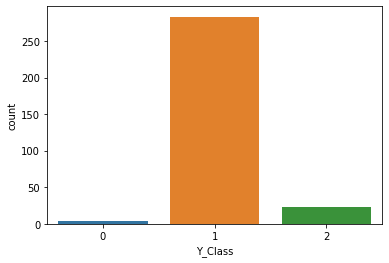

In [75]:
sns.countplot(test_x['Y_Class'])

In [76]:
submit = pd.read_csv('sample_submission.csv')

In [ ]:
submit

,PRODUCT_ID,Y_Class
0,TEST_000,0
1,TEST_001,0
2,TEST_002,0
3,TEST_003,0
4,TEST_004,0
...,...,...
305,TEST_305,0
306,TEST_306,0
307,TEST_307,0
308,TEST_308,0


In [77]:
submit['Y_Class'] = test_x['Y_Class']

In [78]:
submit.to_csv('0215_4pred.csv', index=False)